In [3]:
from qpmr import *
import control as ctl
import numpy as np

In [50]:
def stability_crossing_curve(k, x, z, w_0, sigma, w_in = 0):
    w_fin = np.sqrt(2*w_0**5*x+w_0**4*(z-3*sigma)-3*w_0**2*z*sigma**2-z**2*sigma**3)/np.sqrt(z*(w_0**2+z*sigma))
    # frequency variable
    w = np.linspace(w_in, w_fin, 1000)
    # proportional gain as a function of w
    kp = (-w_0**4+4*sigma*w_0**3*x+w_0**2*(w**2-3*sigma**2)+2*w_0*x*z*(sigma**2+w**2)-2*sigma*z*(sigma**2+w**2))/((w_0**2+sigma*z)**2+w**2*z**2)
    # integral gain as a function of w
    ki = -((sigma**2+w**2)*(-2*w_0**3*x-w_0**2*(z-2*sigma)+z*(sigma**2+w**2)))/((w_0**2+sigma*z)**2+w**2*z**2)
    # interval of values of kp to consider in the curve
    kp_in = (-w_0**4+4*w_0**3*x*sigma-3*w_0**2*sigma**2+2*w_0*x*z*sigma**2-1*z*sigma**3)/((w_0**2+z*sigma)**2) # Point corresponding to w = 0 in the parametric curve
    kp_fin = kp[len(kp)-1]
    kp_0 = np.linspace(kp_in, kp_fin, 1000)
    # integral gain as a function of kp and sigma
    ki_0 = (kp_0*sigma*w_0**2+kp_0*sigma**2*z+sigma**3+sigma*w_0**2-2*sigma**2*w_0*x)/(w_0**2+sigma*z)
    
    # Plotting
    plt.plot(kp, ki, 'k', linewidth=2)
    plt.plot(kp_0, ki_0, 'k',linewidth=2)
    plt.xlabel(r'$k_p$', fontsize='large')
    plt.ylabel(r'$k_i$', fontsize='large')
    plt.title('Stability crossing curves')

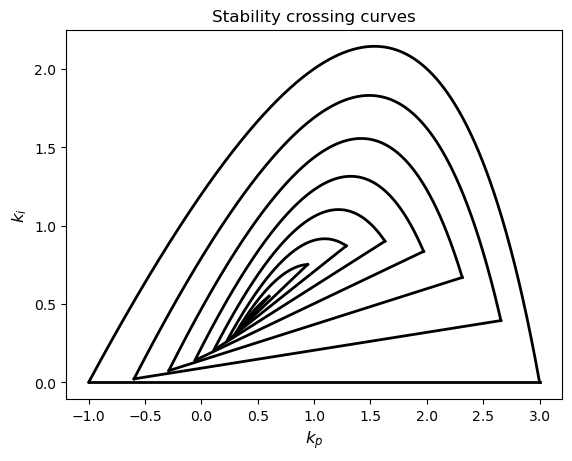

In [51]:
k = 1
w_0 = np.sqrt(2)
x = 3/(2*w_0)
z=1
sigma = np.linspace(0, 0.8, 8)
for n in range(len(sigma)):
    stability_crossing_curve(k, x, z, w_0, sigma[n])